In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

In [5]:
starry_night = plt.imread('VanGogh1.jpg')

In [6]:
type(starry_night)

numpy.ndarray

In [7]:
starry_night.shape

(950, 1200, 3)

In [8]:
starry_night.dtype

dtype('uint8')

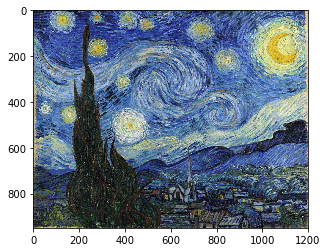

In [9]:
plt.imshow(starry_night)

In [10]:
starry_night.min(), starry_night.max()

(0, 255)

In [11]:
rows, cols, color_depth = starry_night.shape

In [12]:
flat_starry_night = np.reshape(starry_night, (rows * cols, color_depth))

In [13]:
flat_starry_night.shape
#rows and columns (red, green, blue)

(1140000, 3)

In [33]:
starry_night_model = MiniBatchKMeans(n_clusters=12)

In [34]:
starry_night_model.fit(flat_starry_night)
#ou .fit_predict()

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=12,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [35]:
labels_predicted = starry_night_model.predict(flat_starry_night)

In [36]:
labels_predicted

array([2, 0, 0, ..., 4, 4, 5])

In [37]:
starry_night_model.cluster_centers_

array([[ 42.12087912,  51.1978022 ,  64.00549451],
       [139.96899225, 163.56589147, 172.25581395],
       [100.3       , 123.76363636, 138.65454545],
       [ 42.47019868,  63.67549669, 125.35761589],
       [184.19642857, 187.98214286, 135.58928571],
       [196.74712644, 208.67816092, 193.42528736],
       [ 67.00584795,  94.0877193 , 152.35087719],
       [ 96.61538462, 129.77622378, 181.11888112],
       [ 79.09876543,  88.24691358,  89.01234568],
       [192.53333333, 175.26666667,  56.53333333],
       [ 23.1005291 ,  27.16931217,  27.56613757],
       [128.87209302, 160.65116279, 209.38372093]])

In [38]:
palette = starry_night_model.cluster_centers_.astype(int)

In [39]:
palette

array([[ 42,  51,  64],
       [139, 163, 172],
       [100, 123, 138],
       [ 42,  63, 125],
       [184, 187, 135],
       [196, 208, 193],
       [ 67,  94, 152],
       [ 96, 129, 181],
       [ 79,  88,  89],
       [192, 175,  56],
       [ 23,  27,  27],
       [128, 160, 209]])

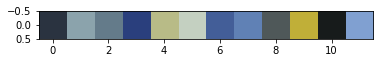

In [40]:
plt.imshow(palette.reshape(1, 12, 3));

In [41]:
labels_predicted

array([2, 0, 0, ..., 4, 4, 5])

In [42]:
new_starry_night = palette[labels_predicted]

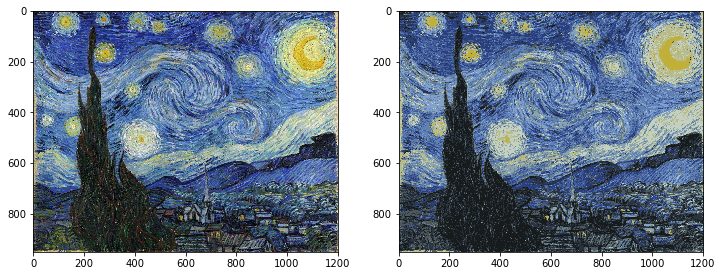

In [43]:
fig, plots = plt.subplots(ncols=2, figsize=(12, 5))
plots[0].imshow(starry_night)
plots[1].imshow(new_starry_night.astype(int).reshape(rows, cols, color_depth));

In [44]:
sunflower = np.array(Image.open('VanGogh2.jpg'))

In [45]:
sunflower_columns = sunflower.reshape((-1, 3))
sunflower_columns

array([[174, 182, 145],
       [176, 183, 149],
       [183, 190, 156],
       ...,
       [215, 169,  58],
       [215, 169,  58],
       [212, 166,  55]], dtype=uint8)

In [46]:
sunflower_labels = starry_night_model.predict(sunflower_columns)

In [47]:
sunflower_labels

array([4, 4, 4, ..., 9, 9, 9])

In [48]:
sunflower_recoloured = starry_night_model.cluster_centers_[
    sunflower_labels].astype(np.uint8).reshape(sunflower.shape)

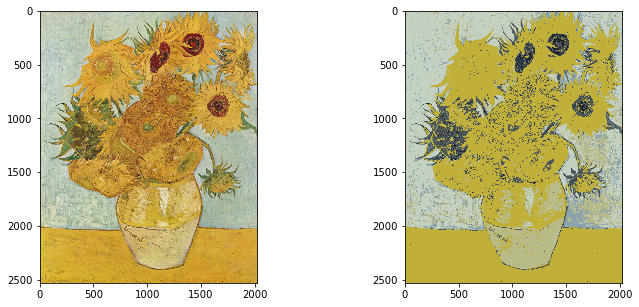

In [49]:
fig, plots = plt.subplots(ncols=2, figsize=(12, 5))
plots[0].imshow(sunflower)
plots[1].imshow(sunflower_recoloured)

## Invertendo

In [67]:
starry = np.array(Image.open('VanGogh1.jpg'))
# reshaping into columns
starry_columns = starry.reshape((-1, 3))
starry.shape

(950, 1200, 3)

In [72]:
sunflower_model = MiniBatchKMeans(n_clusters=12)
labels_sun = sunflower_model.fit_predict(sunflower_columns)

In [73]:
recoloured_sun = sunflower_model.cluster_centers_[labels_sun].astype(np.uint8).reshape(
    sunflower.shape)

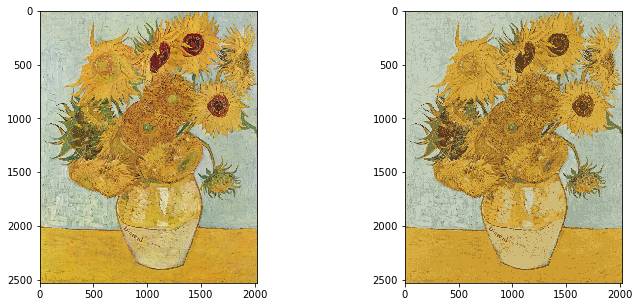

In [74]:
fig, plots = plt.subplots(ncols=2, figsize=(12, 5))
plots[0].imshow(sunflower)
plots[1].imshow(recoloured_sun);

In [75]:
palette_sun = sunflower_model.cluster_centers_.astype(int)

palette_sun

array([[114, 119,  68],
       [177, 150,  81],
       [180, 192, 174],
       [205, 159,  49],
       [208, 186, 120],
       [158, 111,  40],
       [197, 207, 187],
       [ 86,  57,  30],
       [182, 134,  46],
       [162, 175, 155],
       [215, 173,  67],
       [128,  78,  30]])

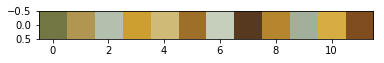

In [76]:
plt.imshow(palette_sun.reshape(1, -1, 3));

In [77]:
starry_labels = sunflower_model.predict(starry_columns)

In [78]:
starry_labels

array([0, 7, 7, ..., 4, 4, 6])

In [79]:
starry_recoloured = sunflower_model.cluster_centers_[
    starry_labels].astype(np.uint8).reshape(starry.shape)

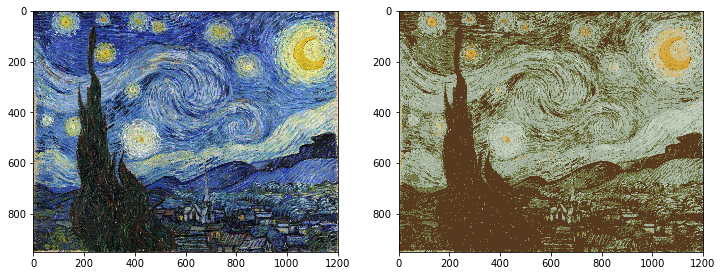

In [80]:
fig, plots = plt.subplots(ncols=2, figsize=(12, 5))
plots[0].imshow(starry)
plots[1].imshow(starry_recoloured);

## Botas

In [83]:
boots = np.array(Image.open('VanGogh3.jpg'))
boots_columns = boots.reshape((-1, 3))

In [84]:
boots_columns

array([[128, 124, 121],
       [109,  99,  90],
       [101,  88,  80],
       ...,
       [159, 180, 183],
       [144, 163, 167],
       [144, 158, 161]], dtype=uint8)

In [85]:
boots_labels = starry_night_model.predict(boots_columns)

In [86]:
boots_labels

array([2, 8, 8, ..., 1, 1, 1])

In [88]:
boots_recol_starry = starry_night_model.cluster_centers_[
    boots_labels].astype(np.uint8).reshape(boots.shape)

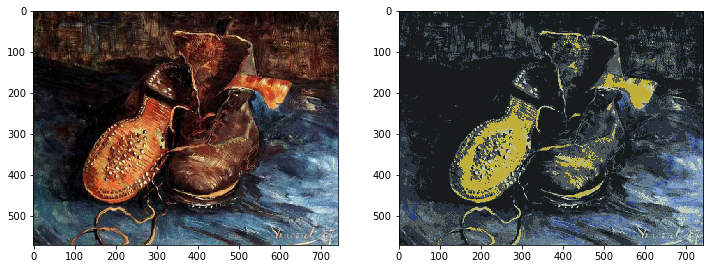

In [89]:
fig, plots = plt.subplots(ncols=2, figsize=(12,5))
plots[0].imshow(boots)
plots[1].imshow(boots_recol_starry);

In [90]:
boots_labels2 = sunflower_model.predict(boots_columns)
boots_labels2

array([0, 0, 0, ..., 2, 9, 9])

In [93]:
boots_recol_sun = sunflower_model.cluster_centers_[boots_labels2].astype(np.uint8).reshape(boots.shape)

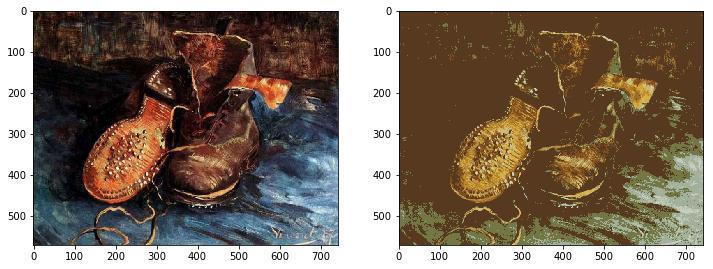

In [94]:
fig, plots = plt.subplots(ncols=2, figsize=(12, 5))
plots[0].imshow(boots)
plots[1].imshow(boots_recol_sun);

## Munch

In [95]:
grito = np.array(Image.open('Munch.jpg'))

In [96]:
grito_columns = grito.reshape((-1, 3))

In [97]:
grito_columns

array([[205, 165, 106],
       [218, 187, 140],
       [139, 121,  83],
       ...,
       [ 35,  25,  23],
       [ 46,  32,  29],
       [ 58,  43,  38]], dtype=uint8)

In [99]:
grito.shape

(1012, 800, 3)

In [126]:
starry_night_model2 = MiniBatchKMeans(n_clusters=30)

In [127]:
starry_night_model2.fit(flat_starry_night)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=30,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [128]:
grito_labels = starry_night_model2.predict(grito_columns)

In [129]:
grito_labels

array([ 8, 20, 13, ..., 14,  9,  9])

In [130]:
grito_recol_starry = starry_night_model2.cluster_centers_[grito_labels].astype(np.uint8).reshape(grito.shape)

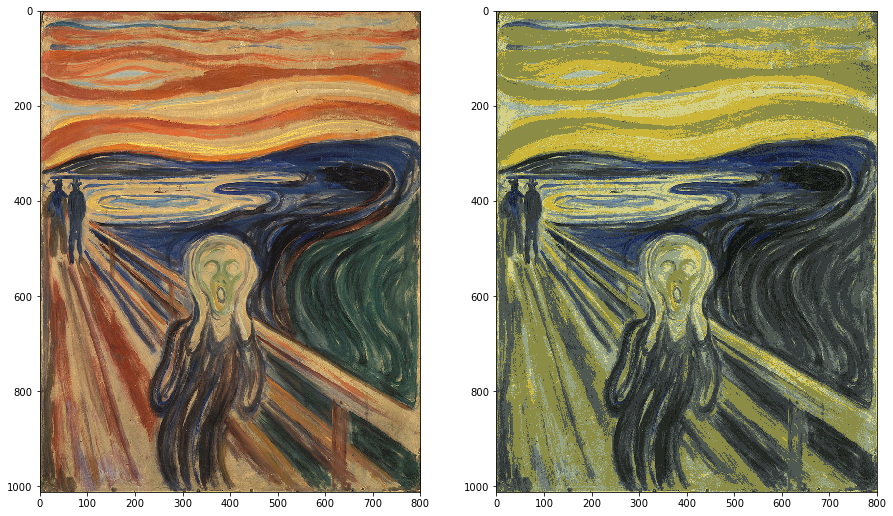

In [131]:
fig, plots = plt.subplots(ncols=2, figsize=(15,10))
plots[0].imshow(grito)
plots[1].imshow(grito_recol_starry)